<b>Phase 2 Assignment</b><br></br>
<i>KMeans algorithm </i><br>
<b>Dataset: </b>breast cancer data from the phase 1<br>

In [3]:
#import all required libraries

%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

<b>Load and print head of dataset</b>

In [64]:
df = pd.read_csv('../data/BreastCancerWisconsin.csv') 
print(df[20:30])
df['A7'] = df['A7'].replace('?', np.NaN)
df['A7'] = pd.to_numeric(df['A7'])
df = df.fillna(df.mean(skipna=True))
print(df[20:30])

        Scn  A2  A3  A4  A5  A6  A7  A8  A9  A10  CLASS
20  1054590   7   3   2  10   5  10   5   4    4      4
21  1054593  10   5   5   3   6   7   7  10    1      4
22  1056784   3   1   1   1   2   1   2   1    1      2
23  1057013   8   4   5   1   2   ?   7   3    1      4
24  1059552   1   1   1   1   2   1   3   1    1      2
25  1065726   5   2   3   4   2   7   3   6    1      4
26  1066373   3   2   1   1   1   1   2   1    1      2
27  1066979   5   1   1   1   2   1   2   1    1      2
28  1067444   2   1   1   1   2   1   2   1    1      2
29  1070935   1   1   3   1   2   1   1   1    1      2
        Scn  A2  A3  A4  A5  A6         A7  A8  A9  A10  CLASS
20  1054590   7   3   2  10   5  10.000000   5   4    4      4
21  1054593  10   5   5   3   6   7.000000   7  10    1      4
22  1056784   3   1   1   1   2   1.000000   2   1    1      2
23  1057013   8   4   5   1   2   3.544656   7   3    1      4
24  1059552   1   1   1   1   2   1.000000   3   1    1      2
25  10

<b>Get only A2-A10 colums from Dataset</b>

In [43]:
df = df.iloc[:, 1:10]
print(df.head(10))

   A2  A3  A4  A5  A6    A7  A8  A9  A10
0   5   1   1   1   2   1.0   3   1    1
1   5   4   4   5   7  10.0   3   2    1
2   3   1   1   1   2   2.0   3   1    1
3   6   8   8   1   3   4.0   3   7    1
4   4   1   1   3   2   1.0   3   1    1
5   8  10  10   8   7  10.0   9   7    1
6   1   1   1   1   2  10.0   3   1    1
7   2   1   2   1   2   1.0   3   1    1
8   2   1   1   1   2   1.0   1   1    5
9   4   2   1   1   2   1.0   2   1    1


<b>Create KMeans model for n_cluster = 4<br>
Fit model to the data<br>
Calculate centroids<br>
Print centroids - you should have a matrix with 4 row (4 clusters) and 9  columns (for each A column)<br></b>

In [12]:
model = KMeans(n_clusters=4)
# fit kmeans object to data df
model.fit(df)
labels = model.predict(df)
centroids = model.cluster_centers_
print(centroids)

[[2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.3514006
  2.06167401 1.20044053 1.07709251]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.45322005
  5.38028169 6.81690141 2.30985915]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]]


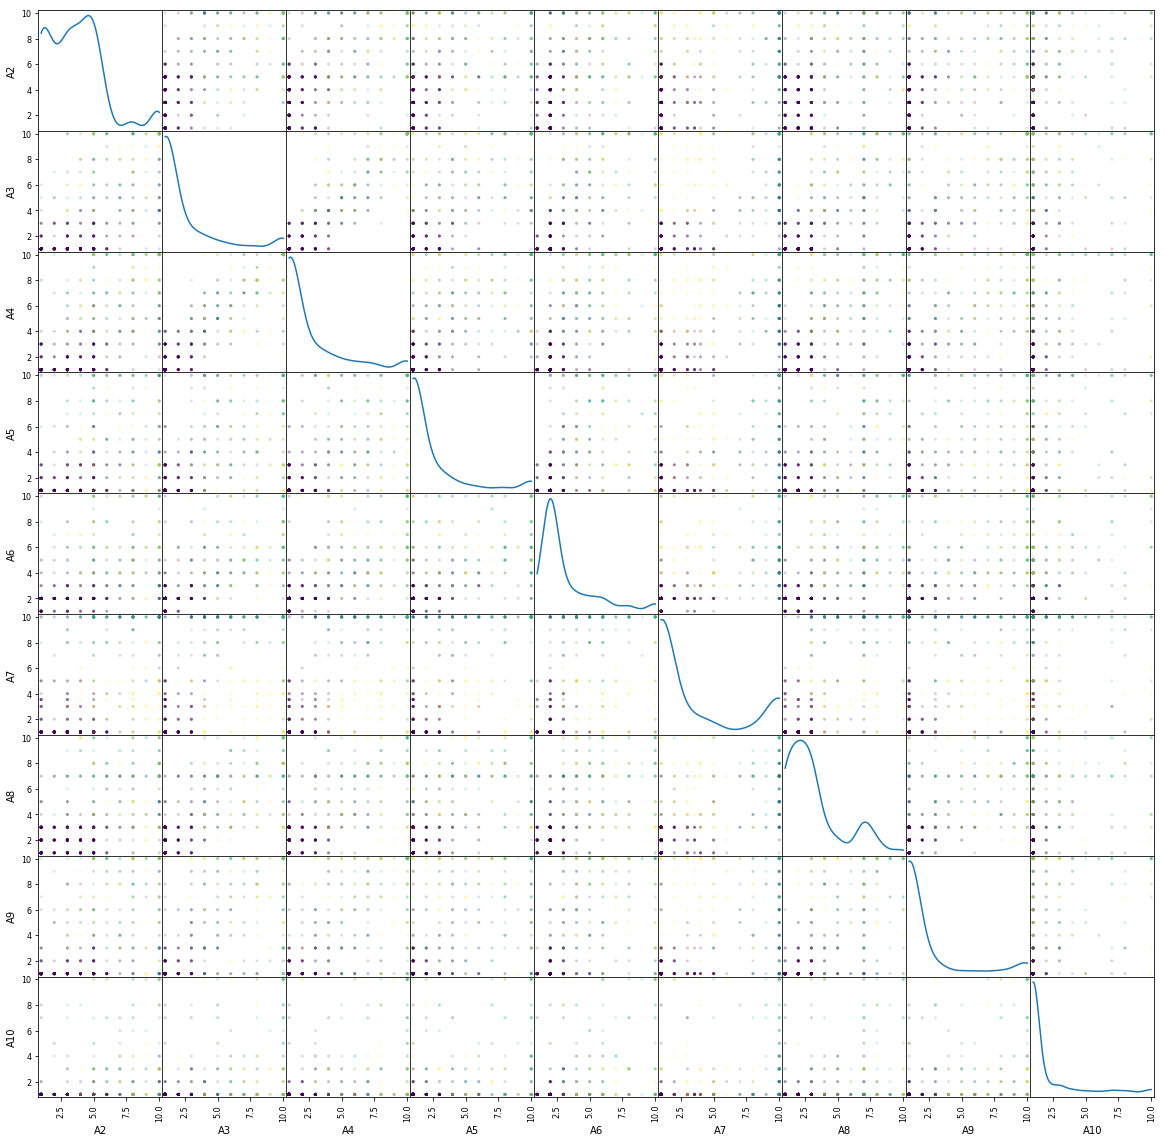

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, c=labels, alpha=.2, figsize=(20,20), diagonal='kde')
plt.show()

<b>Find the optimal number of clusters</b>

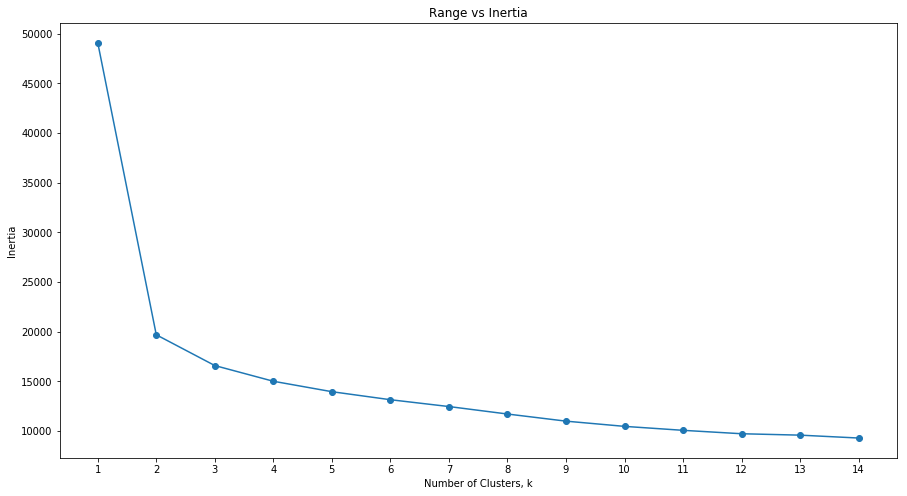

In [9]:
#Calulate Inertia
# make a range
ks = range(1, 15)

inertias = [] # empty list

# do a for loop
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(df)    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot Range vs Inertias
plt.figure(figsize=(15,8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

<b>Optimal Number of Clusters Analysis:</b>

A good cluster has low inertia, specifically, this means it is a tight cluster. Additionally, when clustering data it is important to keep in mind that the optimal number of clusters is not too large. Therefore, the optimal number is the point in which the inertia begins to decrease more slowly. The optimal number would be three.

In [10]:
from statistics import stdev
std_df=df.std()
print (std_df.round(2))

A2     2.82
A3     3.05
A4     2.97
A5     2.86
A6     2.21
A7     3.60
A8     2.44
A9     3.05
A10    1.72
dtype: float64


<b>Plot standard deviation values</b>

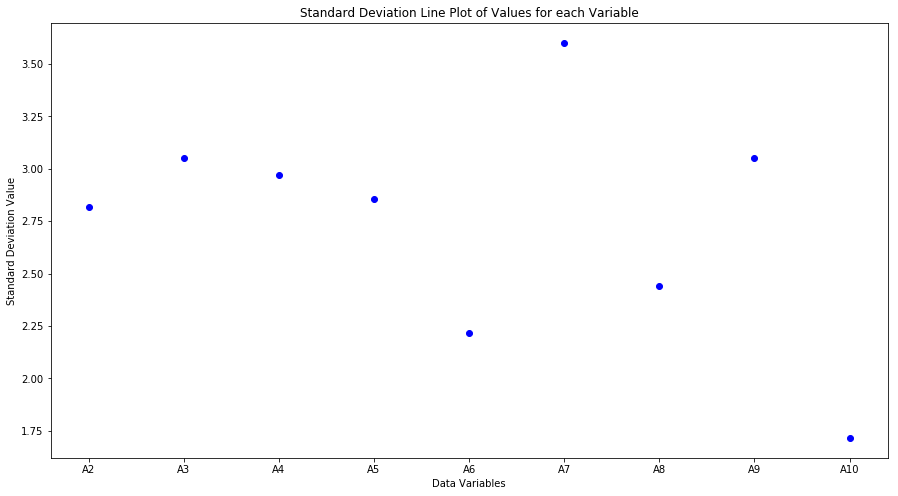

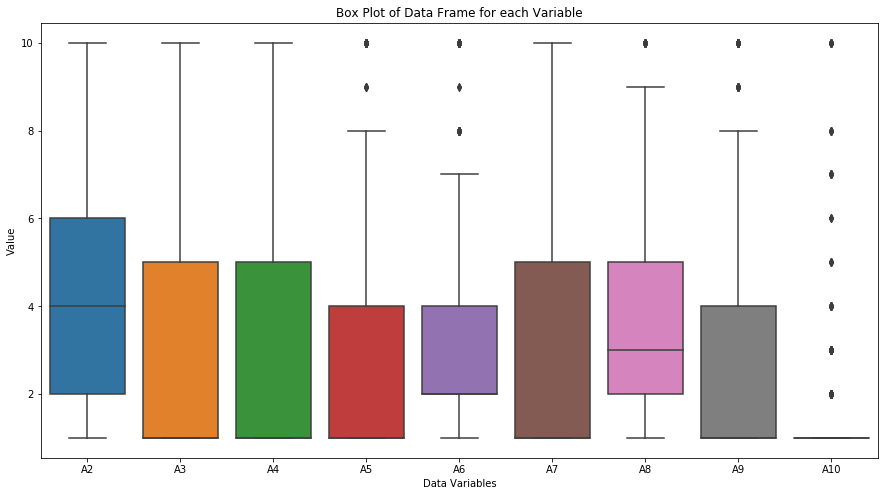

In [11]:
#Create a plot showing all standard deviation values
plt.figure(figsize=(15,8))
plt.plot(std_df,'bo')
plt.title('Standard Deviation Line Plot of Values for each Variable')
plt.xlabel('Data Variables')
plt.ylabel('Standard Deviation Value')
plt.show()

#Create a box plot of the dataframe
import seaborn as sns
plt.figure(figsize=(15,8))
ax=sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.title('Box Plot of Data Frame for each Variable')
plt.xlabel('Data Variables')
plt.ylabel('Value')
plt.show()

<b>Data Variation Analysis:</b>

The variables with the highest standard deviations are A7, A9, A3, and A4. This tells us that these variables have the greatest variance. This is also illustrated with the box plot.

<b>Implement normalization</b>

In [13]:
#Perform normalization
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
# Create KMeans instance: kmeans
model = KMeans(n_clusters=3) # We are using three here because this is the optimal number of clusters. 
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,model)
pipeline.fit(df)
labels = pipeline.predict(df)
centroids = model.cluster_centers_
print(centroids)

[[ 0.94324425  1.06056115  1.0579358   0.87929444  0.86029786  1.12907601
   1.00835139  0.92952452  0.03297812]
 [-0.51945334 -0.61728918 -0.61702732 -0.52103625 -0.53370405 -0.60430508
  -0.56576652 -0.54283279 -0.29912703]
 [ 1.16860808  1.75960552  1.77223164  1.58294095  1.86961155  1.16430087
   1.3895322   1.56650375  3.80910288]]
